In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import plotly.graph_objects as go




npdf = pd.read_csv('/Users/manasgoyal/Downloads/npurchaser.csv')
nrdf = pd.read_csv('/Users/manasgoyal/Downloads/nreceiver.csv')

In [2]:
npdf.head()

index                      URN Journal Date Date of Purchase  \
0      1  00001201904120000001166  12/Apr/2019      12/Apr/2019   
1      2  00001201904120000001166  12/Apr/2019      12/Apr/2019   
2      3  00001201904120000001166  12/Apr/2019      12/Apr/2019   
3      4  00001201904120000001166  12/Apr/2019      12/Apr/2019   
4      5  00001201904120000001166  12/Apr/2019      12/Apr/2019   

  Date of Expiry prefix            Purchaser  bondno  denomination  \
0    26/Apr/2019     TL  A B C INDIA LIMITED   11448       1000000   
1    26/Apr/2019     TL  A B C INDIA LIMITED   11447       1000000   
2    26/Apr/2019     TL  A B C INDIA LIMITED   11441       1000000   
3    26/Apr/2019     OL  A B C INDIA LIMITED    1113        100000   
4    26/Apr/2019     OL  A B C INDIA LIMITED    1118        100000   

   issueBranch  issueTeller status  
0            1      5899230   Paid  
1            1      5899230   Paid  
2            1      5899230   Paid  
3            1      5899230   Paid  
4            1      5899230   Paid

In [3]:
nrdf.head()

index Date of Encashment                           Political party  \
0      1        12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
1      2        12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
2      3        12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
3      4        12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
4      5        12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   

    Account no prefix  bondno  denomination  payBranch  payTeller  
0  *******5199     OC     775      10000000        800    2770121  
1  *******5199     OC    3975      10000000        800    2770121  
2  *******5199     OC    3967      10000000        800    2770121  
3  *******5199     TL   10418       1000000        800    2770121  
4  *******5199     TL     126       1000000        800    2770121

In [4]:
combined_df = pd.merge(npdf, nrdf, left_on=['bondno', 'denomination'], 
                       right_on=['bondno', 'denomination'], how='inner')


In [5]:
combined_df.head()

index_x                      URN Journal Date Date of Purchase  \
0        1  00001201904120000001166  12/Apr/2019      12/Apr/2019   
1        2  00001201904120000001166  12/Apr/2019      12/Apr/2019   
2        3  00001201904120000001166  12/Apr/2019      12/Apr/2019   
3        4  00001201904120000001166  12/Apr/2019      12/Apr/2019   
4        5  00001201904120000001166  12/Apr/2019      12/Apr/2019   

  Date of Expiry prefix_x            Purchaser  bondno  denomination  \
0    26/Apr/2019       TL  A B C INDIA LIMITED   11448       1000000   
1    26/Apr/2019       TL  A B C INDIA LIMITED   11447       1000000   
2    26/Apr/2019       TL  A B C INDIA LIMITED   11441       1000000   
3    26/Apr/2019       OL  A B C INDIA LIMITED    1113        100000   
4    26/Apr/2019       OL  A B C INDIA LIMITED    1118        100000   

   issueBranch  issueTeller status  index_y Date of Encashment  \
0            1      5899230   Paid     2766        25/Apr/2019   
1            1      5899230   Paid     2767        25/Apr/2019   
2            1      5899230   Paid     2768        25/Apr/2019   
3            1      5899230   Paid     2807        25/Apr/2019   
4            1      5899230   Paid     2808        25/Apr/2019   

          Political party   Account no prefix_y  payBranch  payTeller  
0  BHARATIYA JANATA PARTY  *******8244       TL        691    3300196  
1  BHARATIYA JANATA PARTY  *******8244       TL        691    3300196  
2  BHARATIYA JANATA PARTY  *******8244       TL        691    3300196  
3  BHARATIYA JANATA PARTY  *******8244       OL        691    3300196  
4  BHARATIYA JANATA PARTY  *******8244       OL        691    3300196

In [6]:
combined_df['Date of Purchase'] = pd.to_datetime(combined_df['Date of Purchase'])
combined_df['Date of Encashment'] = pd.to_datetime(combined_df['Date of Encashment'])
combined_df['Journal Date'] = pd.to_datetime(combined_df['Journal Date'])
combined_df['Date of Expiry'] = pd.to_datetime(combined_df['Date of Expiry'])

In [7]:
branch_states = {
    691: 'Delhi',
    628: 'Haryana, Punjab and Chandigarh',
    718: 'Himachal Pradesh',
    2295: 'Jammu and Kashmir',
    630: 'Uttarakhand',
    1355: 'Gujarat, Dadar & Nagar Haveli and Daman & Diu',
    1308: 'Madhya Pradesh',
    461: 'Chhattisgarh',
    656: 'Rajasthan',
    300: 'Maharashtra',
    509: 'Goa, Lakshadweep',
    125: 'Uttar Pradesh',
    41: 'Odisha',
    1: 'West Bengal and Andaman & Nicobar',
    152: 'Bihar',
    167: 'Jharkhand',
    232: 'Sikkim',
    6091: 'Arunachal Pradesh',
    214: 'Nagaland',
    78: 'Assam',
    92: 'Manipur',
    181: 'Meghalaya',
    1539: 'Mizoram',
    2: 'Tripura',
    952: 'Andhra Pradesh',
    847: 'Telangana',
    800: 'Tamil Nadu and Puducherry',
    813: 'Karnataka',
    941: 'Kerala'
}

combined_df['State'] = combined_df['issueBranch'].map(branch_states)



In [8]:
combined_df.head()

index_x                      URN Journal Date Date of Purchase  \
0        1  00001201904120000001166   2019-04-12       2019-04-12   
1        2  00001201904120000001166   2019-04-12       2019-04-12   
2        3  00001201904120000001166   2019-04-12       2019-04-12   
3        4  00001201904120000001166   2019-04-12       2019-04-12   
4        5  00001201904120000001166   2019-04-12       2019-04-12   

  Date of Expiry prefix_x            Purchaser  bondno  denomination  \
0     2019-04-26       TL  A B C INDIA LIMITED   11448       1000000   
1     2019-04-26       TL  A B C INDIA LIMITED   11447       1000000   
2     2019-04-26       TL  A B C INDIA LIMITED   11441       1000000   
3     2019-04-26       OL  A B C INDIA LIMITED    1113        100000   
4     2019-04-26       OL  A B C INDIA LIMITED    1118        100000   

   issueBranch  issueTeller status  index_y Date of Encashment  \
0            1      5899230   Paid     2766         2019-04-25   
1            1      5899230   Paid     2767         2019-04-25   
2            1      5899230   Paid     2768         2019-04-25   
3            1      5899230   Paid     2807         2019-04-25   
4            1      5899230   Paid     2808         2019-04-25   

          Political party   Account no prefix_y  payBranch  payTeller  \
0  BHARATIYA JANATA PARTY  *******8244       TL        691    3300196   
1  BHARATIYA JANATA PARTY  *******8244       TL        691    3300196   
2  BHARATIYA JANATA PARTY  *******8244       TL        691    3300196   
3  BHARATIYA JANATA PARTY  *******8244       OL        691    3300196   
4  BHARATIYA JANATA PARTY  *******8244       OL        691    3300196   

                               State  
0  West Bengal and Andaman & Nicobar  
1  West Bengal and Andaman & Nicobar  
2  West Bengal and Andaman & Nicobar  
3  West Bengal and Andaman & Nicobar  
4  West Bengal and Andaman & Nicobar

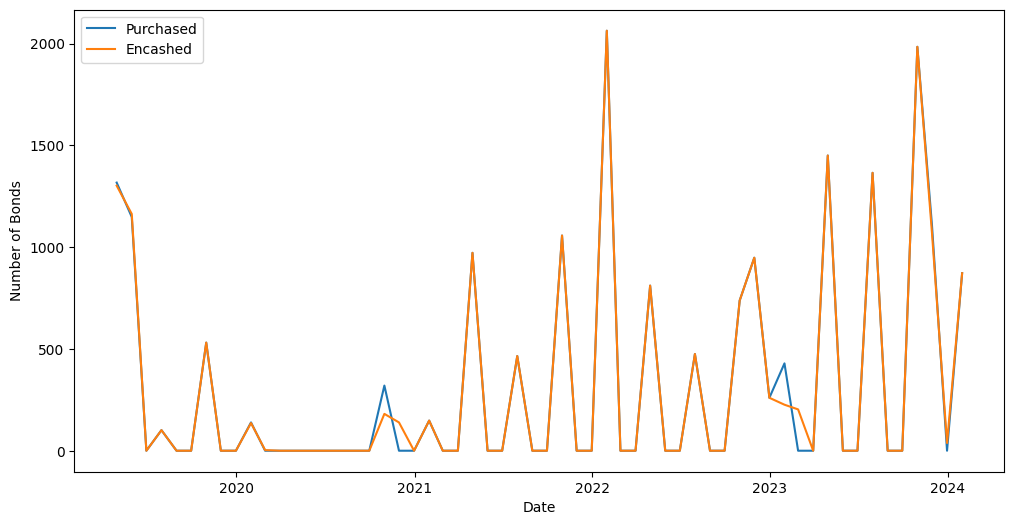

In [44]:
#  Purchase and Encashment Trend
purchase_trend = combined_df.groupby(pd.Grouper(key='Date of Purchase', freq='ME')).size().reset_index()
encashment_trend = combined_df.groupby(pd.Grouper(key='Date of Encashment', freq='ME')).size().reset_index()

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(purchase_trend['Date of Purchase'], purchase_trend[0], label='Purchased')
ax.plot(encashment_trend['Date of Encashment'], encashment_trend[0], label='Encashed')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Bonds')
ax.legend()
plt.show()

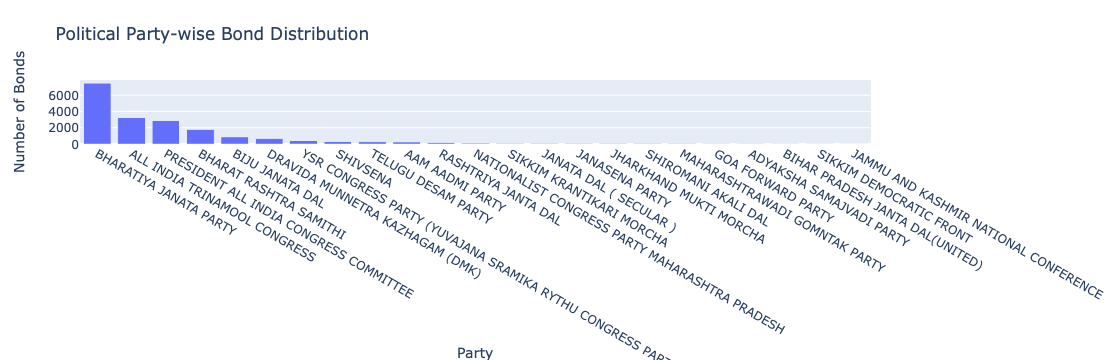

In [10]:
#  Political Party-wise Bond Distribution
party_dist = combined_df['Political party'].value_counts().reset_index()
party_dist.columns = ['Party', 'Number of Bonds']

fig = px.bar(party_dist, x='Party', y='Number of Bonds', title='Political Party-wise Bond Distribution')
fig.show()

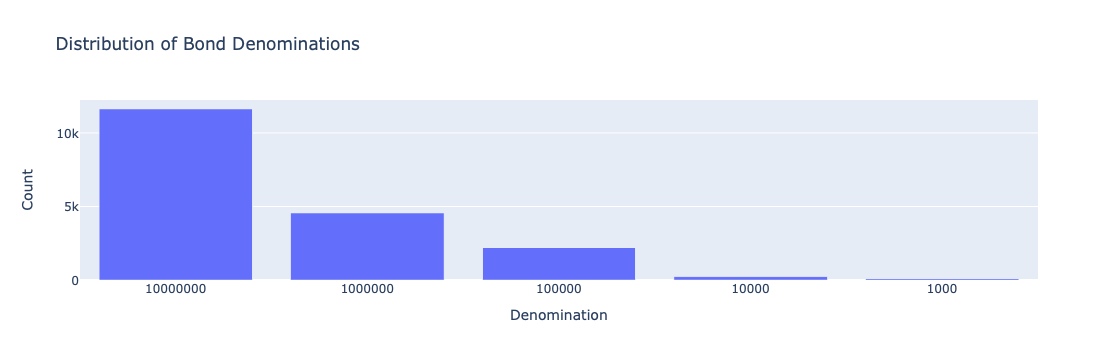

In [16]:
# Distribution of Bond Denominations
denomination_dist = combined_df['denomination'].value_counts().reset_index()
denomination_dist.columns = ['Denomination', 'Count']

fig = px.bar(denomination_dist, x='Denomination', y='Count', title='Distribution of Bond Denominations')

fig.update_layout(xaxis=dict(type='category')) 

fig.show()

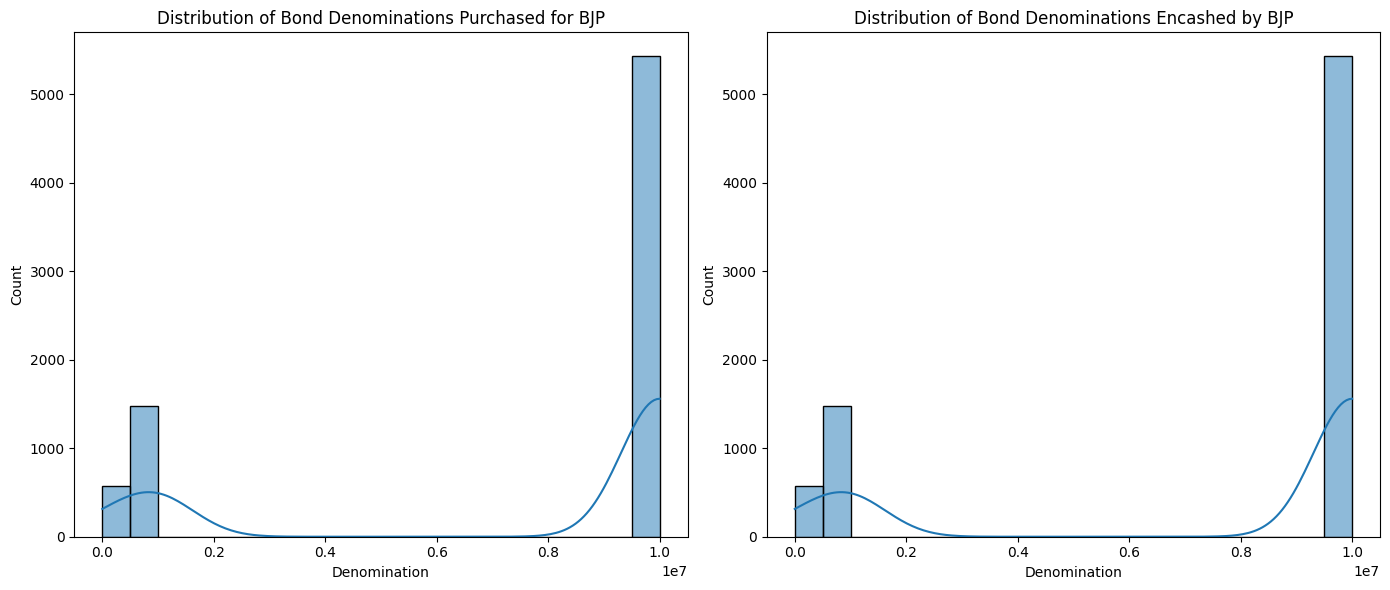

In [29]:
# Financial Distribution Analysis
bjp_financial = combined_df[combined_df['Political party'] == 'BHARATIYA JANATA PARTY']
bjp_total_purchased = bjp_financial['denomination'].sum()
bjp_total_encashed = bjp_financial[~bjp_financial['Date of Encashment'].isnull()]['denomination'].sum()

# Visualize the distribution of bond denominations purchased and encashed by the BJP
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(bjp_financial['denomination'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Bond Denominations Purchased for BJP')
axes[0].set_xlabel('Denomination')

sns.histplot(bjp_financial[~bjp_financial['Date of Encashment'].isnull()]['denomination'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribution of Bond Denominations Encashed by BJP')
axes[1].set_xlabel('Denomination')

plt.tight_layout()
plt.show()

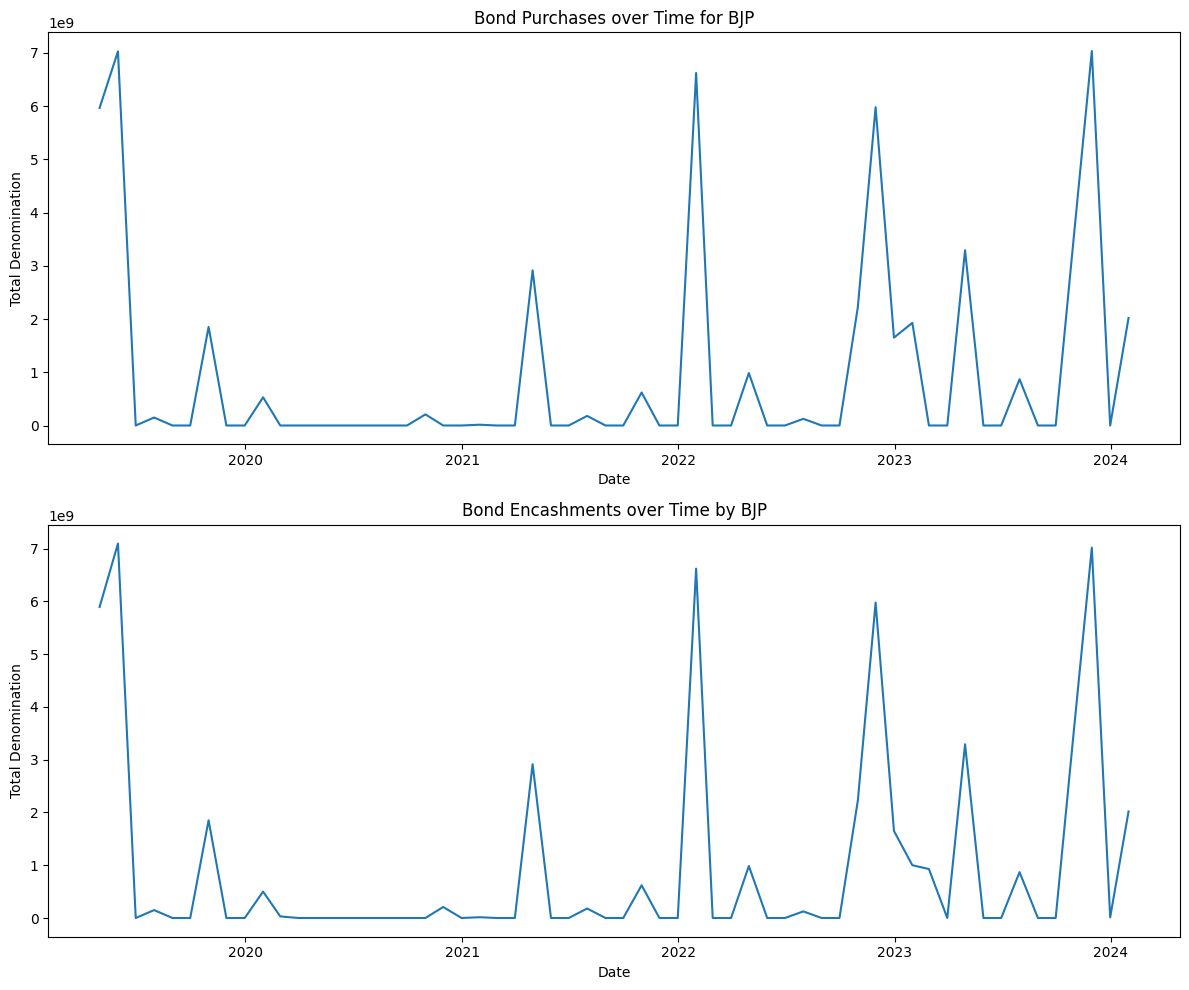

In [43]:
# Temporal Analysis
bjp_temporal_purchase = bjp_financial.groupby(pd.Grouper(key='Date of Purchase', freq='ME'))['denomination'].sum().reset_index()
bjp_temporal_encashment = bjp_financial.groupby(pd.Grouper(key='Date of Encashment', freq='ME'))['denomination'].sum().reset_index()

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
sns.lineplot(data=bjp_temporal_purchase, x='Date of Purchase', y='denomination', ax=ax[0])
ax[0].set_title('Bond Purchases over Time for BJP')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Total Denomination')

sns.lineplot(data=bjp_temporal_encashment, x='Date of Encashment', y='denomination', ax=ax[1])
ax[1].set_title('Bond Encashments over Time by BJP')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Total Denomination')

plt.tight_layout()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



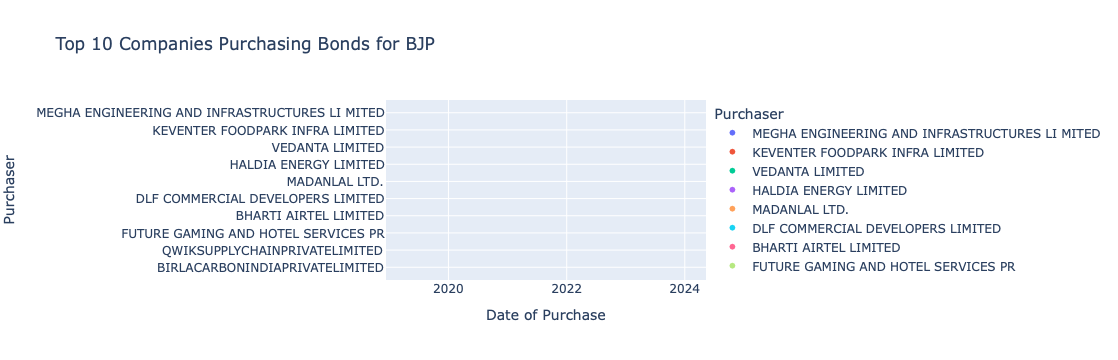

In [31]:
# Filter data for BJP
bjp_data = combined_df[combined_df['Political party'] == 'BHARATIYA JANATA PARTY']

# Group by Purchaser and sum up the denomination for each company
top_donors = bjp_data.groupby('Purchaser')['denomination'].sum().reset_index()

# Sort by denomination to get top donors
top_donors = top_donors.sort_values(by='denomination', ascending=False).head(10)

# Map top 10 companies' purchase dates
top_purchase_dates = bjp_data[bjp_data['Purchaser'].isin(top_donors['Purchaser'])]

fig = px.scatter(top_purchase_dates, 
                 x='Date of Purchase', 
                 y='Purchaser', 
                 color='Purchaser',
                 title='Top 10 Companies Purchasing Bonds for BJP')
fig.show()

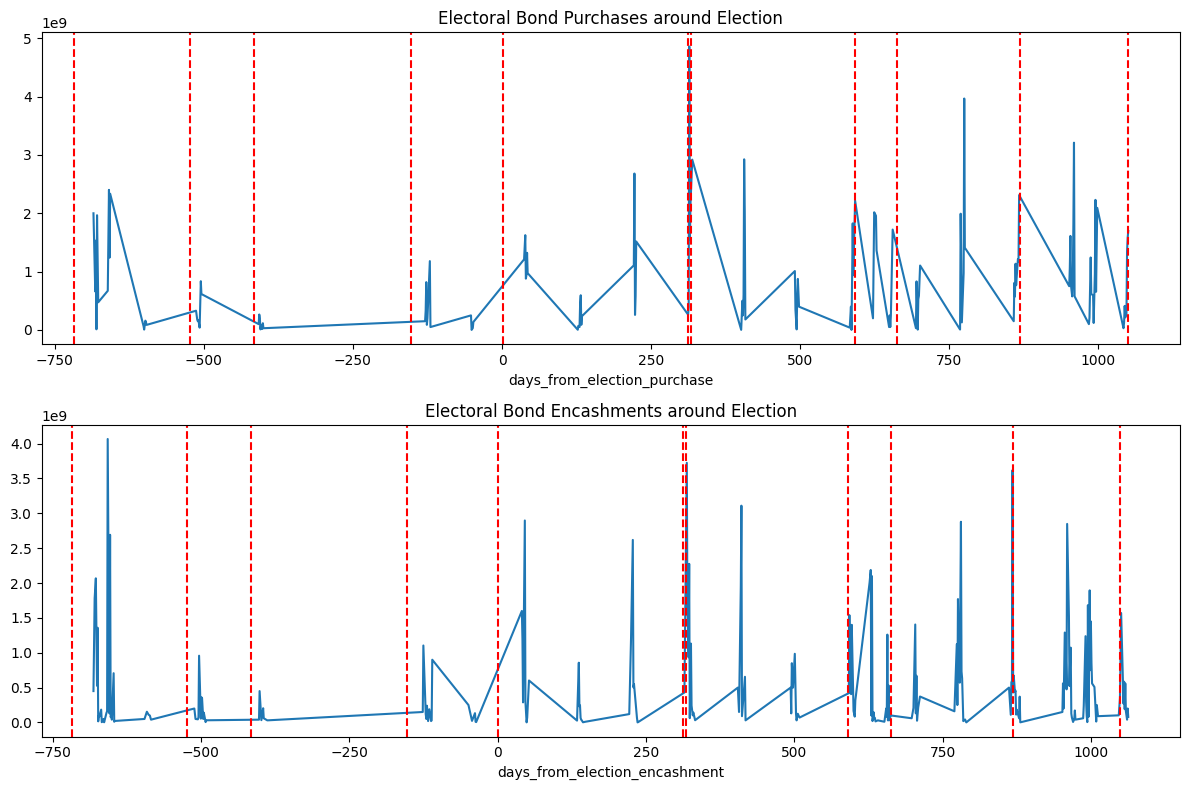

In [42]:

election_announcement_dates = {
    "2019-03-10": "General Elections 2019",
    "2019-09-21": "Maharashtra and Haryana Assembly Elections 2019",
    "2020-01-06": "Delhi Assembly Elections 2020",
    "2020-09-25": "Bihar Assembly Elections 2020",
    "2021-02-26": "West Bengal, Tamil Nadu, Kerala, Assam, and Puducherry Assembly Elections 2021",
    "2022-01-03": "Uttar Pradesh Assembly Elections 2022",
    "2022-01-08": "Punjab, Goa, Uttarakhand, Manipur, Gujarat, and Himachal Pradesh Assembly Elections 2022",
    "2022-12-20": "Madhya Pradesh, Rajasthan, Chhattisgarh, Mizoram, Telangana Assembly Elections 2023",
    "2023-07-13": "West Bengal local elections",
    "2022-10-09": "Dates announced for genreal election in 5 states ",
    "2024-01-10": "Andhra Pradesh Assembly Elections 2024"
    
}

# Calculate time delta from election date
election_date = pd.Timestamp('2021-02-25')
combined_df['days_from_election_purchase'] = (combined_df['Date of Purchase'] - election_date).dt.days
combined_df['days_from_election_encashment'] = (combined_df['Date of Encashment'] - election_date).dt.days

# Plot purchases and encashments around election
fig, axs = plt.subplots(2, 1, figsize=(12, 8))
combined_df.groupby('days_from_election_purchase')['denomination'].sum().plot(ax=axs[0])
axs[0].set_title('Electoral Bond Purchases around Election')

combined_df.groupby('days_from_election_encashment')['denomination'].sum().plot(ax=axs[1])
axs[1].set_title('Electoral Bond Encashments around Election')

# Add dotted lines for each election announcement date
for date, cause in election_announcement_dates.items():
    announcement_date = pd.Timestamp(date)
    days_from_election = (announcement_date - election_date).days
    axs[0].axvline(days_from_election, color='r', linestyle='--', label=cause)
    axs[1].axvline(days_from_election, color='r', linestyle='--', label=cause)

plt.tight_layout()
plt.show()


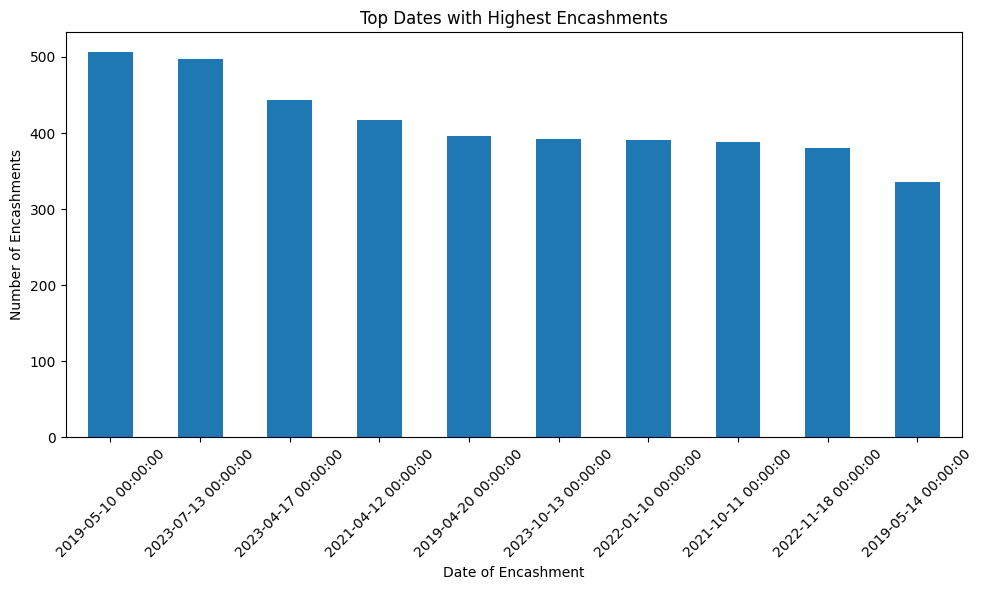

In [52]:
top_encashment_dates = combined_df['Date of Encashment'].value_counts().head(10)

# Plot the top dates with the highest encashments
plt.figure(figsize=(10, 6))
top_encashment_dates.plot(kind='bar')
plt.title('Top Dates with Highest Encashments')
plt.xlabel('Date of Encashment')
plt.ylabel('Number of Encashments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

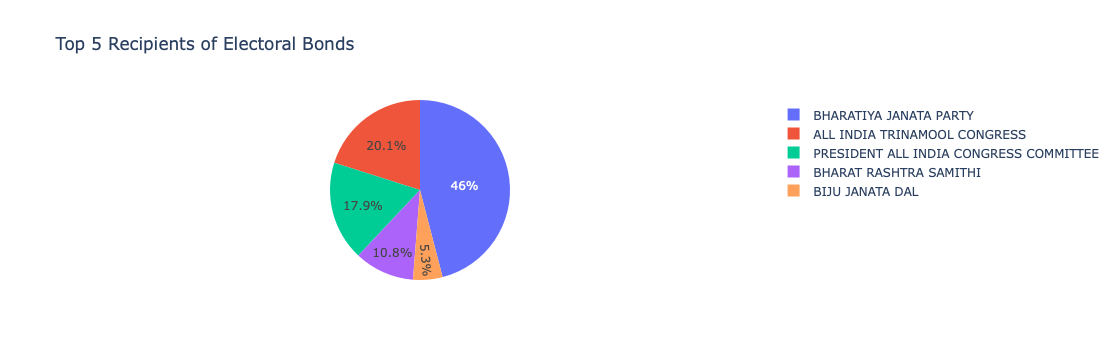

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



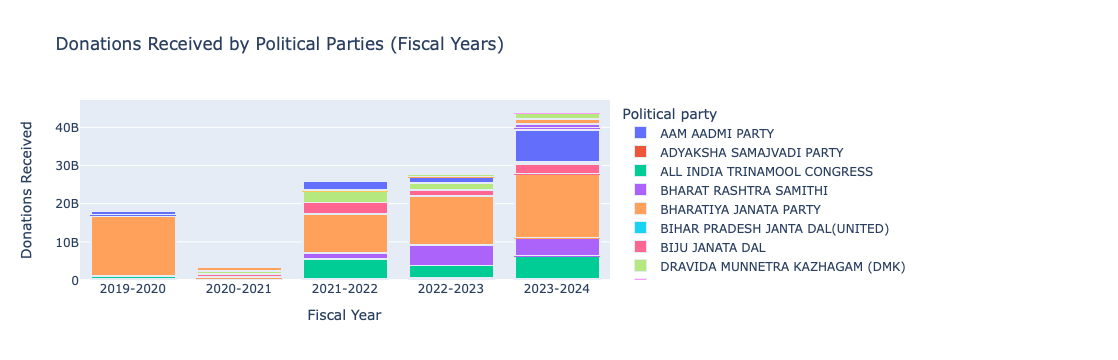

In [54]:
top_recipients = combined_df['Political party'].value_counts().head(5).reset_index()
top_recipients.columns = ['Party', 'Number of Bonds']
fig = px.pie(top_recipients, values='Number of Bonds', names='Party', title='Top 5 Recipients of Electoral Bonds')
fig.show()

fiscal_years = {
    '2019-2020': (pd.Timestamp(2019, 4, 1), pd.Timestamp(2020, 3, 31)),
    '2020-2021': (pd.Timestamp(2020, 4, 1), pd.Timestamp(2021, 3, 31)),
    '2021-2022': (pd.Timestamp(2021, 4, 1), pd.Timestamp(2022, 3, 31)),
    '2022-2023': (pd.Timestamp(2022, 4, 1), pd.Timestamp(2023, 3, 31)),
    '2023-2024': (pd.Timestamp(2023, 4, 1), pd.Timestamp(2024, 3, 31))
}


# Filter the data for each fiscal year and calculate donations received by political parties
party_donations_fy = pd.DataFrame()
for fy, (fy_start, fy_end) in fiscal_years.items():
    donations_fy = combined_df[(combined_df['Date of Encashment'] >= fy_start) & (combined_df['Date of Encashment'] <= fy_end)]
    donations_fy_summary = donations_fy.groupby('Political party')['denomination'].sum().reset_index()
    donations_fy_summary['Fiscal Year'] = fy
    party_donations_fy = pd.concat([party_donations_fy, donations_fy_summary])

# Plot the data
fig = px.bar(party_donations_fy, x='Fiscal Year', y='denomination', color='Political party', 
             title='Donations Received by Political Parties (Fiscal Years)', 
             labels={'denomination': 'Donations Received', 'Fiscal Year': 'Fiscal Year'},
             barmode='stack')
fig.show()

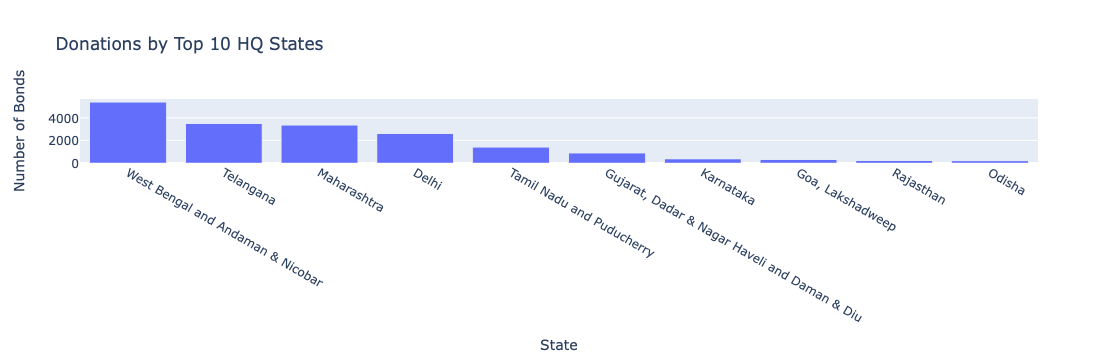

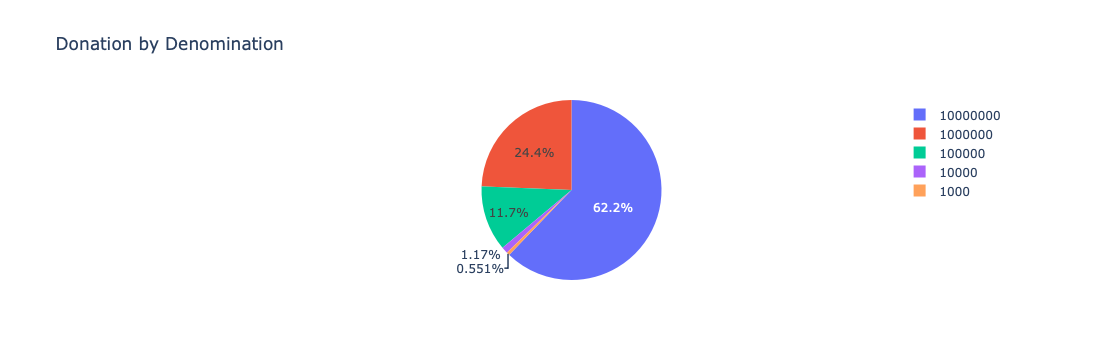

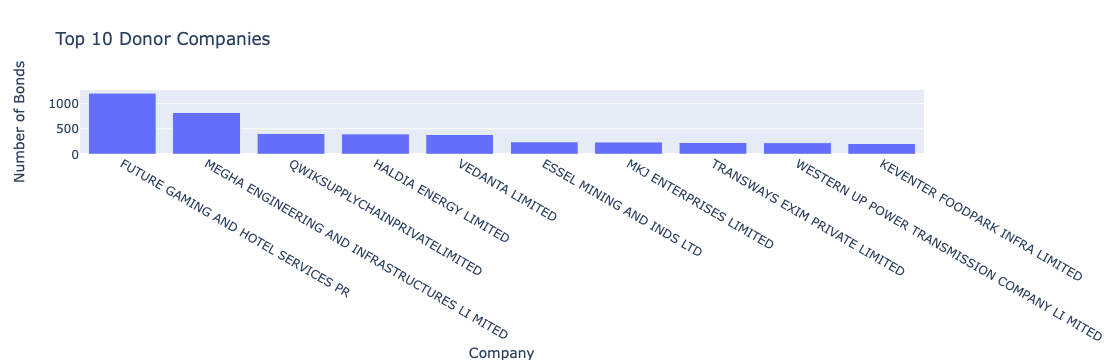

In [55]:
# Donations by Top 10 HQ States (Bar Chart)
top_states = combined_df['State'].value_counts().head(10).reset_index()
top_states.columns = ['State', 'Number of Bonds']
fig = px.bar(top_states, x='State', y='Number of Bonds', title='Donations by Top 10 HQ States')
fig.show()


# Donation by Denomination (Pie Chart)
denomination_counts = combined_df['denomination'].value_counts().reset_index()
denomination_counts.columns = ['Denomination', 'Count']
fig = px.pie(denomination_counts, values='Count', names='Denomination', title='Donation by Denomination')
fig.show()

# Top 10 Donor Companies (Bar Chart)
top_donors = combined_df['Purchaser'].value_counts().head(10).reset_index()
top_donors.columns = ['Company', 'Number of Bonds']
fig = px.bar(top_donors, x='Company', y='Number of Bonds', title='Top 10 Donor Companies')
fig.show()

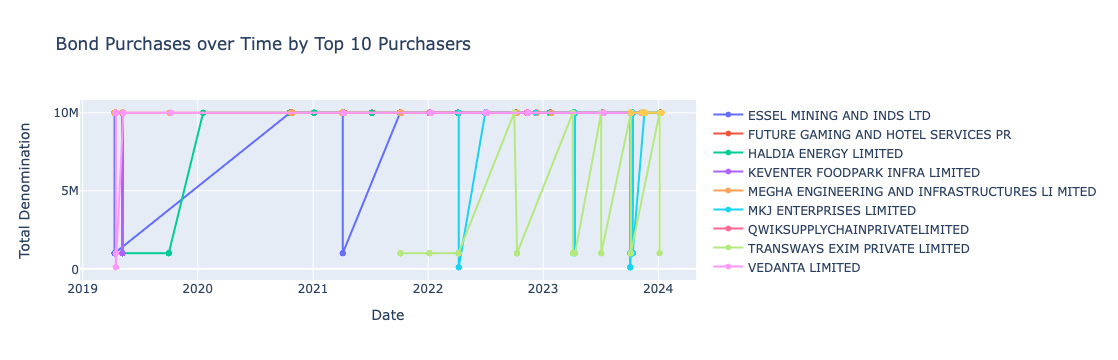

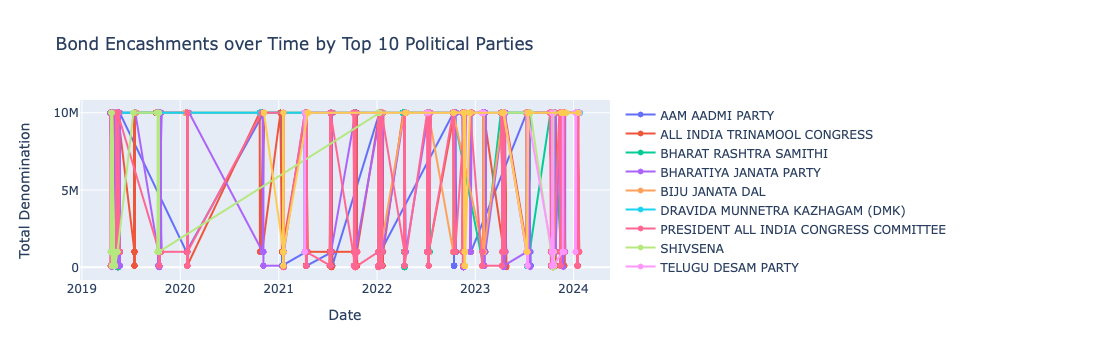

In [21]:
# Bond Purchases over Time by Top 10 Purchasers
fig = go.Figure()
for purchaser, group in purchase_ts_top10.groupby('Purchaser'):
    fig.add_trace(go.Scatter(x=group['Date of Purchase'], y=group['denomination'], mode='lines+markers', name=purchaser))

fig.update_layout(title='Bond Purchases over Time by Top 10 Purchasers', xaxis_title='Date', yaxis_title='Total Denomination')
fig.show()

# Bond Encashments over Time by Top 10 Political Parties
fig = go.Figure()
for party, group in encashment_ts_top10.groupby('Political party'):
    fig.add_trace(go.Scatter(x=group['Date of Encashment'], y=group['denomination'], mode='lines+markers', name=party))

fig.update_layout(title='Bond Encashments over Time by Top 10 Political Parties', xaxis_title='Date', yaxis_title='Total Denomination')
fig.show()

In [50]:
npdf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             18871 non-null  int64 
 1   URN               18871 non-null  object
 2   Journal Date      18871 non-null  object
 3   Date of Purchase  18871 non-null  object
 4   Date of Expiry    18871 non-null  object
 5   prefix            18871 non-null  object
 6   Purchaser         18838 non-null  object
 7   bondno            18871 non-null  int64 
 8   denomination      18871 non-null  int64 
 9   issueBranch       18871 non-null  int64 
 10  issueTeller       18871 non-null  int64 
 11  status            18871 non-null  object
dtypes: int64(5), object(7)
memory usage: 1.7+ MB


In [52]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18702 entries, 0 to 18701
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index_x                        18702 non-null  int64         
 1   URN                            18702 non-null  object        
 2   Journal Date                   18702 non-null  datetime64[ns]
 3   Date of Purchase               18702 non-null  datetime64[ns]
 4   Date of Expiry                 18702 non-null  datetime64[ns]
 5   prefix_x                       18702 non-null  object        
 6   Purchaser                      18702 non-null  object        
 7   bondno                         18702 non-null  int64         
 8   denomination                   18702 non-null  int64         
 9   issueBranch                    18702 non-null  int64         
 10  issueTeller                    18702 non-null  int64         
 11  status         

In [53]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18702 entries, 0 to 18701
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   index_x                        18702 non-null  int64         
 1   URN                            18702 non-null  object        
 2   Journal Date                   18702 non-null  datetime64[ns]
 3   Date of Purchase               18702 non-null  datetime64[ns]
 4   Date of Expiry                 18702 non-null  datetime64[ns]
 5   prefix_x                       18702 non-null  object        
 6   Purchaser                      18702 non-null  object        
 7   bondno                         18702 non-null  int64         
 8   denomination                   18702 non-null  int64         
 9   issueBranch                    18702 non-null  int64         
 10  issueTeller                    18702 non-null  int64         
 11  status         

In [55]:
combined_df.tail(20)

index_x                      URN Journal Date Date of Purchase  \
18682    18852  00847202401110000003738   2024-01-11       2024-01-11   
18683    18853  00847202401110000003738   2024-01-11       2024-01-11   
18684    18854  00847202401110000003738   2024-01-11       2024-01-11   
18685    18855  00847202401110000003738   2024-01-11       2024-01-11   
18686    18856  00847202401110000003738   2024-01-11       2024-01-11   
18687    18857  00847202401110000003738   2024-01-11       2024-01-11   
18688    18858  00847202401110000003738   2024-01-11       2024-01-11   
18689    18859  00847202401110000003738   2024-01-11       2024-01-11   
18690    18860  00847202401110000003738   2024-01-11       2024-01-11   
18691    18861  00847202401110000003738   2024-01-11       2024-01-11   
18692    18862  00847202401110000003738   2024-01-11       2024-01-11   
18693    18863  00847202401110000003738   2024-01-11       2024-01-11   
18694    18864  00001202401110000003729   2024-01-11       2024-01-11   
18695    18865  00001202401110000003729   2024-01-11       2024-01-11   
18696    18866  00001202401110000003729   2024-01-11       2024-01-11   
18697    18867  00001202401110000003729   2024-01-11       2024-01-11   
18698    18868  00001202401110000003729   2024-01-11       2024-01-11   
18699    18869  00001202401110000003729   2024-01-11       2024-01-11   
18700    18870  00001202401110000003729   2024-01-11       2024-01-11   
18701    18871  00001202401110000003729   2024-01-11       2024-01-11   

      Date of Expiry prefix_x                                       Purchaser  \
18682     2024-01-25       OC  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
18683     2024-01-25       OC  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
18684     2024-01-25       OC  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
18685     2024-01-25       OC  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
18686     2024-01-25       OC  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
18687     2024-01-25       OC  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
18688     2024-01-25       OC  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
18689     2024-01-25       OC  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
18690     2024-01-25       OC  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
18691     2024-01-25       OC  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
18692     2024-01-25       OC  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
18693     2024-01-25       OC  WESTERN UP POWER TRANSMISSION COMPANY LI MITED   
18694     2024-01-25       OC                  WESTWELL GASES PRIVATE LIMITED   
18695     2024-01-25       OC                  WESTWELL GASES PRIVATE LIMITED   
18696     2024-01-25       OC                  WESTWELL GASES PRIVATE LIMITED   
18697     2024-01-25       OC                  WESTWELL GASES PRIVATE LIMITED   
18698     2024-01-25       OC                  WESTWELL GASES PRIVATE LIMITED   
18699     2024-01-25       OC                  WESTWELL GASES PRIVATE LIMITED   
18700     2024-01-25       OC                  WESTWELL GASES PRIVATE LIMITED   
18701     2024-01-25       OC                  WESTWELL GASES PRIVATE LIMITED   

       bondno  denomination  issueBranch  ...  Date of Encashment  \
18682   17077      10000000          847  ...          2024-01-16   
18683   17079      10000000          847  ...          2024-01-16   
18684   17053      10000000          847  ...          2024-01-16   
18685   17085      10000000          847  ...          2024-01-16   
18686   17089      10000000          847  ...          2024-01-16   
18687   17035      10000000          847  ...          2024-01-17   
18688   17037      10000000          847  ...          2024-01-17   
18689   17059      10000000          847  ...          2024-01-16   
18690   17063      10000000          847  ...          2024-01-16   
18691   17091      10000000          847  ...          2024-01-16   
18692   1708

In [19]:
import pandas as pd
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px

df = pd.read_csv('/Users/manasgoyal/Downloads/scrape.csv', skiprows=[222,21830,22598,23823,29300,29553])

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Analysis of Company Events"),
    dcc.Dropdown(
        id='company-dropdown',
        options=[{'label': company, 'value': company} for company in df['company_name'].unique()],
        value=df['company_name'].unique()[0]
    ),
    dcc.Graph(id='event-type-plot')
])

@app.callback(
    Output('event-type-plot', 'figure'),
    [Input('company-dropdown', 'value')]
)
def update_plot(selected_company):
    filtered_df = df[df['company_name'] == selected_company]
    fig = px.scatter(filtered_df, x='date', y='event_type', color='event_type', 
                     title=f"Events for {selected_company}",
                     color_discrete_map={'CONTRACT': 'blue', 'DONATION': 'green', 'ELECTION': 'red'})
    fig.update_traces(marker=dict(size=10), selector=dict(mode='markers'))
    return fig



if __name__ == '__main__':
    app.run_server(debug=True)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-pa